# Spectral clustering


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
A=np.array([[1, 2], [2, 1]])

In [3]:
help(np.linalg)

Help on package numpy.linalg in numpy:

NAME
    numpy.linalg

DESCRIPTION
    ``numpy.linalg``
    
    The NumPy linear algebra functions rely on BLAS and LAPACK to provide efficient
    low level implementations of standard linear algebra algorithms. Those
    libraries may be provided by NumPy itself using C versions of a subset of their
    reference implementations but, when possible, highly optimized libraries that
    take advantage of specialized processor functionality are preferred. Examples
    of such libraries are OpenBLAS, MKL (TM), and ATLAS. Because those libraries
    are multithreaded and processor dependent, environmental variables and external
    packages such as threadpoolctl may be needed to control the number of threads
    or specify the processor architecture.
    
    - OpenBLAS: https://www.openblas.net/
    - threadpoolctl: https://github.com/joblib/threadpoolctl
    
    Please note that the most-used linear algebra functions in NumPy are present in
    t

In [4]:
np.linalg.matrix_power(A,-2)

array([[ 0.55555556, -0.44444444],
       [-0.44444444,  0.55555556]])

In [5]:
from math import sqrt

In [6]:
help(np.linalg.qr)

Help on _ArrayFunctionDispatcher in module numpy.linalg:

qr(a, mode='reduced')
    Compute the qr factorization of a matrix.
    
    Factor the matrix `a` as *qr*, where `q` is orthonormal and `r` is
    upper-triangular.
    
    Parameters
    ----------
    a : array_like, shape (..., M, N)
        An array-like object with the dimensionality of at least 2.
    mode : {'reduced', 'complete', 'r', 'raw'}, optional
        If K = min(M, N), then
    
        * 'reduced'  : returns Q, R with dimensions (..., M, K), (..., K, N) (default)
        * 'complete' : returns Q, R with dimensions (..., M, M), (..., M, N)
        * 'r'        : returns R only with dimensions (..., K, N)
        * 'raw'      : returns h, tau with dimensions (..., N, M), (..., K,)
    
        The options 'reduced', 'complete, and 'raw' are new in numpy 1.8,
        see the notes for more information. The default is 'reduced', and to
        maintain backward compatibility with earlier versions of numpy both
   

In this exercise we follow graph clustering example from David Gleich's tutorial: https://www.dropbox.com/s/w06niyzfe2r8y90/tutorial.pdf?dl=0.

### 1 (Warm up). Finding a partition (0%)
Generate a graph repsresnted by its adjecency matrix that consists of two communities.

In [7]:
# the number of vertices
# (each vertex is an individual actor, for example, a person with certain political views, e.g. republican or democrat)

n = 1000

# an array of n vertices
x = np.arange(n)

# random permutations
np.random.shuffle(x)

# the size of the first group
gs = 450

# let us select gs group members to the first group
group1 = x[:gs]

# and n-gs representatives to the second one
group2 = x[gs:]

# the probability of connection within the first group
p_group1 = 0.5

# the probability of connection within the second group
p_group2 = 0.4

# intergroup connections
p_between = 0.1

# initialistion of the adjacency matrix nxn
A = np.zeros([n, n])

In [8]:
n = 1000

In [9]:
x = np.arange(n)

In [10]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [11]:
np.random.shuffle(x)

In [12]:
x

array([673, 508, 391, 261, 716, 978, 366, 516, 138, 311, 328,  58, 784,
        16, 988, 872, 544, 218, 819, 466, 969, 680, 505, 191, 708,  55,
       606, 610, 411,  64, 137, 439, 959,  33, 163, 565, 937, 998, 671,
       103, 919, 717, 188,  73, 705, 668,  42,  43,  41, 144, 615, 749,
       113, 660, 723, 799, 187, 577, 730, 240,  61, 375, 589, 946, 997,
       310, 600, 598,  19,  18, 756, 423, 295, 273, 305, 691, 816, 389,
       155, 396, 823, 881, 355, 121, 222, 635, 135, 955,  77, 370, 181,
       752, 903, 339, 250, 941, 131, 646, 172, 548, 157,  70,  22, 238,
       629, 315, 457, 595, 803, 388, 145, 456, 780, 541, 818, 692, 174,
       874, 482, 829, 772, 989, 866, 593, 685,  89, 178,  45, 286, 597,
       520, 348,  11, 672, 858,   6, 775, 495, 719, 695, 659, 425,  13,
       697, 887, 611, 101, 441, 878, 380, 382, 976, 741,  39, 507, 372,
       175,  66, 501, 418, 338, 252, 746, 943, 728, 650, 266, 961, 894,
       995, 845, 750, 169,  59, 436, 358, 559, 226,  20, 642, 35

In [13]:
# the size of the first group
gs = 450

# let us select gs group members to the first group
group1 = x[:gs]

In [14]:
len(group1)

450

In [15]:
group1

array([673, 508, 391, 261, 716, 978, 366, 516, 138, 311, 328,  58, 784,
        16, 988, 872, 544, 218, 819, 466, 969, 680, 505, 191, 708,  55,
       606, 610, 411,  64, 137, 439, 959,  33, 163, 565, 937, 998, 671,
       103, 919, 717, 188,  73, 705, 668,  42,  43,  41, 144, 615, 749,
       113, 660, 723, 799, 187, 577, 730, 240,  61, 375, 589, 946, 997,
       310, 600, 598,  19,  18, 756, 423, 295, 273, 305, 691, 816, 389,
       155, 396, 823, 881, 355, 121, 222, 635, 135, 955,  77, 370, 181,
       752, 903, 339, 250, 941, 131, 646, 172, 548, 157,  70,  22, 238,
       629, 315, 457, 595, 803, 388, 145, 456, 780, 541, 818, 692, 174,
       874, 482, 829, 772, 989, 866, 593, 685,  89, 178,  45, 286, 597,
       520, 348,  11, 672, 858,   6, 775, 495, 719, 695, 659, 425,  13,
       697, 887, 611, 101, 441, 878, 380, 382, 976, 741,  39, 507, 372,
       175,  66, 501, 418, 338, 252, 746, 943, 728, 650, 266, 961, 894,
       995, 845, 750, 169,  59, 436, 358, 559, 226,  20, 642, 35

In [16]:
len(group1)

450

In [17]:
# and n-gs representatives to the second one
group2 = x[gs:]

In [18]:
# the probability of connection within the first group
p_group1 = 0.5

# the probability of connection within the second group
p_group2 = 0.4

# intergroup connections
p_between = 0.1

# initialistion of the adjacency matrix nxn
A = np.zeros([n, n])

In [19]:
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
assert A.shape == (1000, 1000)

In [21]:
# adjecency submatrix for the first group
A[np.ix_(group1, group1)].shape

(450, 450)

In [22]:
np.random.rand(gs, gs) < p_group1

array([[ True,  True,  True, ..., False, False,  True],
       [False, False,  True, ...,  True, False, False],
       [ True, False,  True, ..., False,  True, False],
       ...,
       [False,  True,  True, ..., False,  True, False],
       [False, False,  True, ...,  True, False, False],
       [ True, False, False, ...,  True,  True, False]])

In [23]:
np.random.rand(gs, gs) 

array([[0.46976799, 0.61376107, 0.2728413 , ..., 0.7338406 , 0.56946187,
        0.10371075],
       [0.42015538, 0.23785099, 0.68303289, ..., 0.48969862, 0.95652501,
        0.17020528],
       [0.21401119, 0.35455719, 0.2370224 , ..., 0.87174418, 0.01892649,
        0.09722725],
       ...,
       [0.1622116 , 0.96570837, 0.82277609, ..., 0.65933942, 0.50682204,
        0.86720888],
       [0.79004612, 0.28818398, 0.18362309, ..., 0.72656929, 0.08267195,
        0.38984606],
       [0.79235959, 0.04319521, 0.61442878, ..., 0.66116205, 0.13933252,
        0.1998075 ]])

In [24]:
# generation of connections in the first group
A[np.ix_(group1, group1)] = np.random.rand(gs, gs) < p_group1

# generation of connections in the second group
A[np.ix_(group2, group2)] = np.random.rand(n-gs, n-gs) < p_group2

# genegation of intergroup connections
A[np.ix_(group1, group2)] = np.random.rand(gs, n-gs) < p_between

# we need a symmetric matrix for modeling "friendship relationship"
# and cut the upper triangle matrix
A = np.triu(A,1)


# let us transpose it and add to the upper triangle matrix
A = A + A.T

In [25]:
# generation of connections in the first group
A[np.ix_(group1, group1)] = np.random.rand(gs, gs) < p_group1

# generation of connections in the second group
A[np.ix_(group2, group2)] = np.random.rand(n-gs, n-gs) < p_group2

# genegation of intergroup connections
A[np.ix_(group1, group2)] = np.random.rand(gs, n-gs) < p_between



In [26]:
# A.T[10,4]== A[10,4]

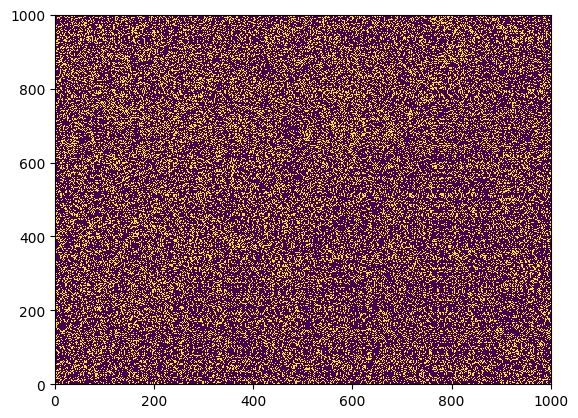

In [27]:
plt.pcolormesh(A)

In [28]:
A = np.triu(A,1)

In [29]:
help(np.triu)

Help on _ArrayFunctionDispatcher in module numpy:

triu(m, k=0)
    Upper triangle of an array.
    
    Return a copy of an array with the elements below the `k`-th diagonal
    zeroed. For arrays with ``ndim`` exceeding 2, `triu` will apply to the
    final two axes.
    
    Please refer to the documentation for `tril` for further details.
    
    See Also
    --------
    tril : lower triangle of an array
    
    Examples
    --------
    >>> np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)
    array([[ 1,  2,  3],
           [ 4,  5,  6],
           [ 0,  8,  9],
           [ 0,  0, 12]])
    
    >>> np.triu(np.arange(3*4*5).reshape(3, 4, 5))
    array([[[ 0,  1,  2,  3,  4],
            [ 0,  6,  7,  8,  9],
            [ 0,  0, 12, 13, 14],
            [ 0,  0,  0, 18, 19]],
           [[20, 21, 22, 23, 24],
            [ 0, 26, 27, 28, 29],
            [ 0,  0, 32, 33, 34],
            [ 0,  0,  0, 38, 39]],
           [[40, 41, 42, 43, 44],
            [ 0, 46, 47, 48, 49]

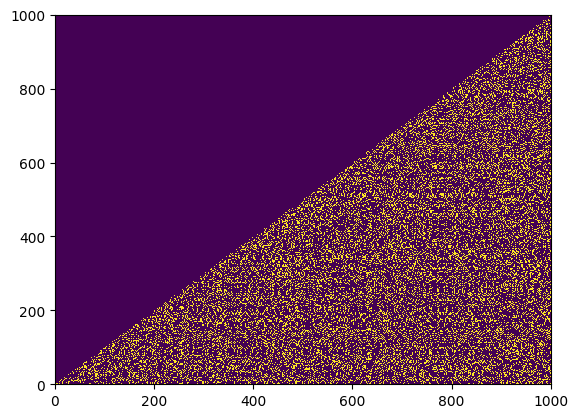

In [30]:
plt.pcolormesh(A)

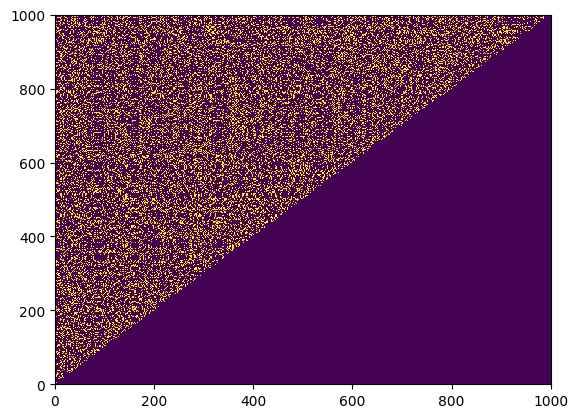

In [31]:
plt.pcolormesh(A.T)

In [32]:
A=A+A.T

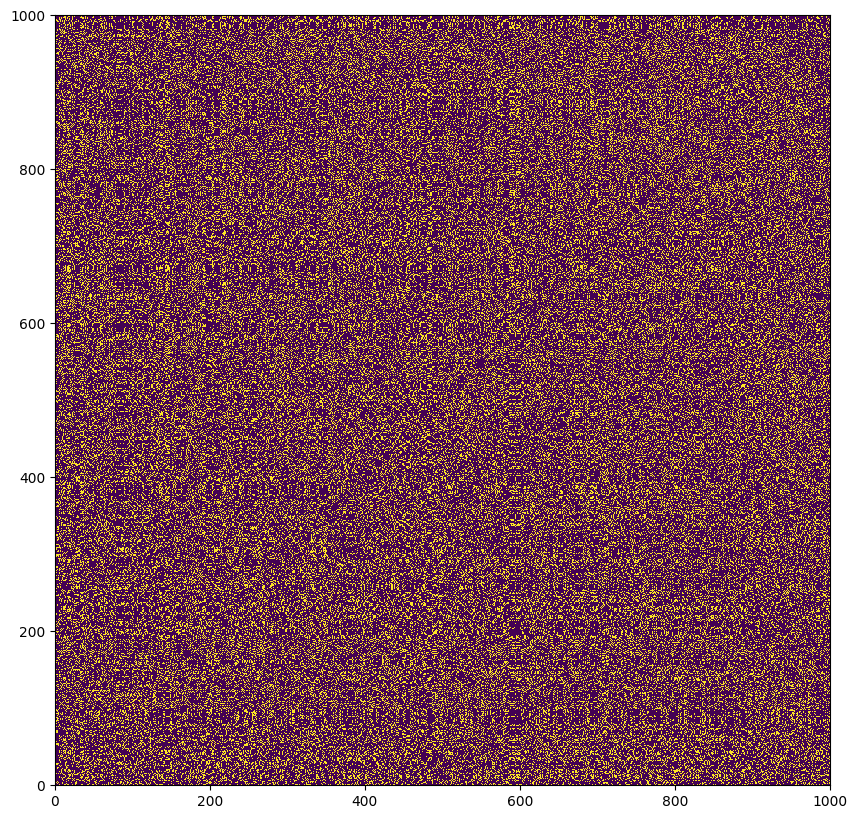

In [33]:
plt.figure(figsize=(10,10))
plt.pcolormesh(A)

In [34]:
 A.min(), A.max()

(0.0, 1.0)

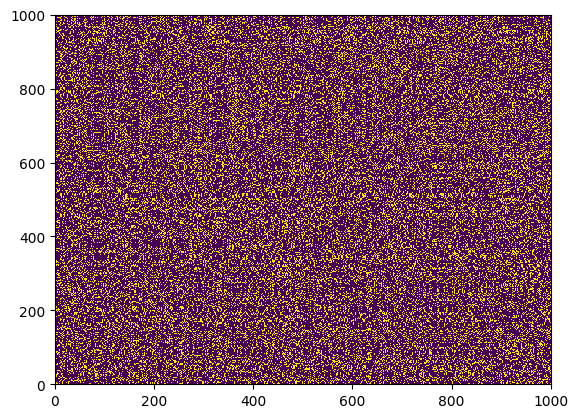

In [35]:
# let us have a look (it seems, the structure is absent)
plt.pcolormesh(A);

In [36]:
A[1,3]==A[3,1]

True

In [37]:
#checking the symmetry
sum(sum(np.abs(A-A.T)))

0.0

In [38]:
#cheking the main diagonal -- it should be empty
sum(np.diag(A))

0.0

Follow the hints from the tutorial. First, calculate the Laplacian matrix, L=D-A, find its second smallest eigenvector, sort it, and use the found indicies and restore the model structure as the two group of  "friends".

In [39]:
sum(A)

array([206., 284., 225., 205., 226., 235., 299., 217., 271., 219., 307.,
       293., 291., 275., 216., 233., 280., 277., 286., 286., 274., 209.,
       308., 231., 206., 273., 227., 233., 219., 224., 231., 239., 301.,
       274., 277., 301., 289., 226., 228., 284., 245., 284., 286., 256.,
       223., 293., 201., 233., 259., 279., 269., 232., 232., 227., 215.,
       277., 231., 248., 290., 283., 266., 257., 184., 283., 295., 225.,
       275., 227., 216., 223., 293., 221., 272., 284., 268., 213., 233.,
       276., 249., 217., 222., 232., 226., 216., 217., 224., 200., 233.,
       210., 267., 213., 239., 232., 221., 220., 230., 258., 209., 221.,
       264., 279., 278., 230., 275., 234., 220., 284., 208., 288., 237.,
       217., 234., 209., 283., 265., 232., 233., 222., 229., 212., 231.,
       286., 266., 237., 265., 241., 273., 206., 237., 215., 236., 236.,
       276., 227., 236., 284., 240., 278., 260., 285., 232., 230., 282.,
       233., 296., 288., 271., 291., 231., 220., 23

(array([  1.,  13.,  72., 175., 227., 251., 134.,  89.,  31.,   7.]),
 array([184. , 196.4, 208.8, 221.2, 233.6, 246. , 258.4, 270.8, 283.2,
        295.6, 308. ]),
 <BarContainer object of 10 artists>)

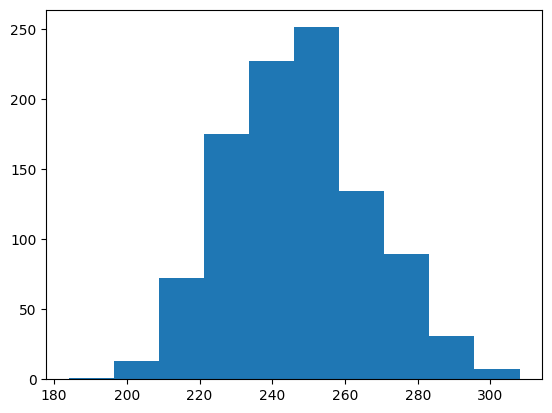

In [40]:
import matplotlib.pyplot as plt
plt.hist(sum(A))

In [41]:
D=np.diag(sum(A))

In [42]:
max(sum(A))

308.0

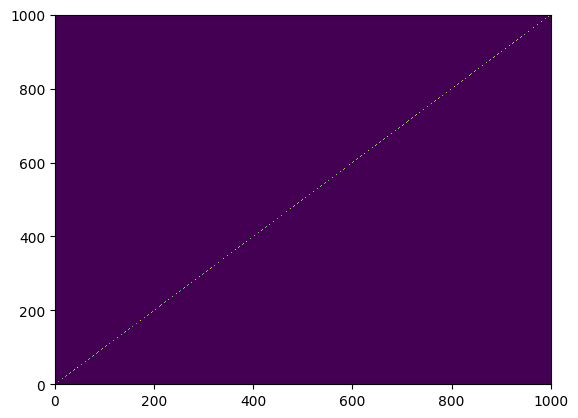

In [43]:
plt.pcolormesh(D);

In [44]:
L=D-A

In [45]:
from scipy.sparse.linalg import eigsh #a better choice than numpy

In [46]:
import scipy
help(scipy.sparse.linalg.eigsh)

Help on function eigsh in module scipy.sparse.linalg._eigen.arpack.arpack:

eigsh(A, k=6, M=None, sigma=None, which='LM', v0=None, ncv=None, maxiter=None, tol=0, return_eigenvectors=True, Minv=None, OPinv=None, mode='normal')
    Find k eigenvalues and eigenvectors of the real symmetric square matrix
    or complex Hermitian matrix A.
    
    Solves ``A @ x[i] = w[i] * x[i]``, the standard eigenvalue problem for
    w[i] eigenvalues with corresponding eigenvectors x[i].
    
    If M is specified, solves ``A @ x[i] = w[i] * M @ x[i]``, the
    generalized eigenvalue problem for w[i] eigenvalues
    with corresponding eigenvectors x[i].
    
    Note that there is no specialized routine for the case when A is a complex
    Hermitian matrix. In this case, ``eigsh()`` will call ``eigs()`` and return the
    real parts of the eigenvalues thus obtained.
    
    Parameters
    ----------
    A : ndarray, sparse matrix or LinearOperator
        A square operator representing the operation `

In [47]:
#W,V=np.linalg.eigh(L)

In [48]:
W,V=eigsh(L,which='SA') #six (by default) eignvalues are sorted in desceding order (by which='SA')

In [49]:
W.shape

(6,)

In [50]:
W

array([-6.60668758e-14,  4.55165980e+01,  1.82037789e+02,  1.96029001e+02,
        1.96543292e+02,  1.97208795e+02])

In [51]:
V[:,1]

array([ 0.03684046, -0.02561352,  0.03527035,  0.03625523,  0.03569238,
        0.03525739, -0.02573315,  0.03590514, -0.02795604,  0.0351937 ,
       -0.02469461, -0.02700823, -0.02521304, -0.02733435,  0.03510412,
        0.03536862, -0.02900244, -0.02623576, -0.02875088, -0.02556109,
       -0.02731027,  0.03637403, -0.02618326,  0.03477967,  0.03636095,
       -0.02875798,  0.03518403,  0.03522049,  0.03615401,  0.03572765,
        0.03544759,  0.03407763, -0.02239087, -0.02773246, -0.02472446,
       -0.02642678, -0.02722433,  0.03422401,  0.03437327, -0.02749581,
        0.03447562, -0.02605275, -0.02609058, -0.02686789,  0.03535434,
       -0.02653243,  0.0355584 ,  0.03486366, -0.02553399, -0.02911037,
       -0.02881843,  0.03390486,  0.03417349,  0.03421694,  0.03414404,
       -0.02902671,  0.03427226,  0.03387382, -0.03020669, -0.02602618,
       -0.02761167, -0.02793879,  0.03686074, -0.02956547, -0.02828099,
        0.03528182, -0.02566071,  0.03368172,  0.0356767 ,  0.03

In [52]:
min(W),max(W)

(-6.606687577178987e-14, 197.20879468897022)

In [53]:
W

array([-6.60668758e-14,  4.55165980e+01,  1.82037789e+02,  1.96029001e+02,
        1.96543292e+02,  1.97208795e+02])

In [54]:
V[:,0] #the first samllest eigenvalue corresponds to the first eigenvector – should be a constant vector k*e, where e=(1,1,...,1), where k=sqrt(1/n)

array([0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162278,
       0.03162278, 0.03162278, 0.03162278, 0.03162278, 0.03162

In [55]:
from math import sqrt

In [56]:
sqrt(1000)/1000

0.03162277660168379

In [57]:
X=V[:,1] #the second smallest eigenvalue corresponds to the second eigenvector
Y=V[:,2]

In [58]:
Ids1=np.argsort(X)
Ids2=np.argsort(Y)

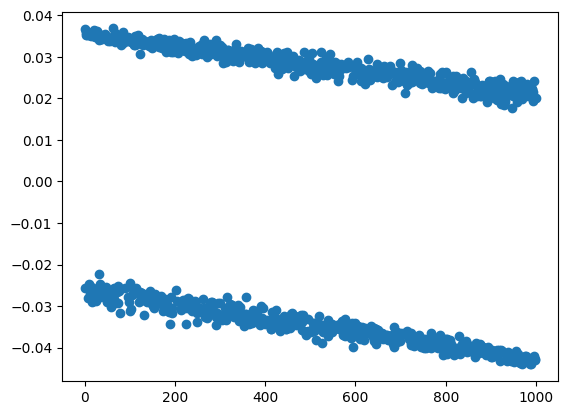

In [59]:
plt.plot(X,"o") #original X

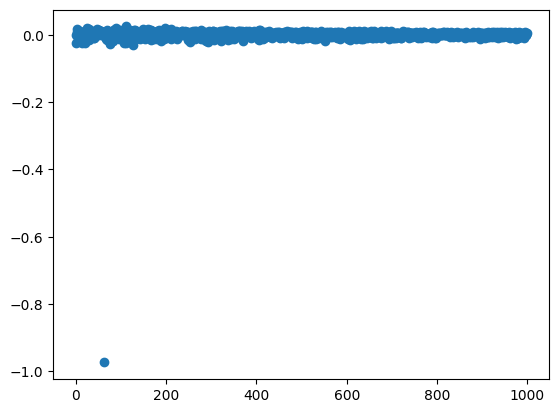

In [60]:
plt.plot(Y,"o") #original X

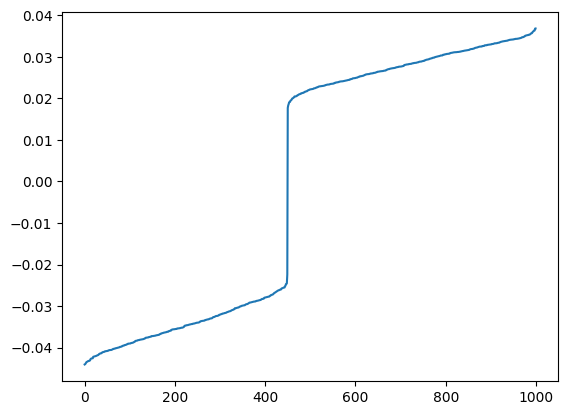

In [61]:
plt.plot(X[Ids1])

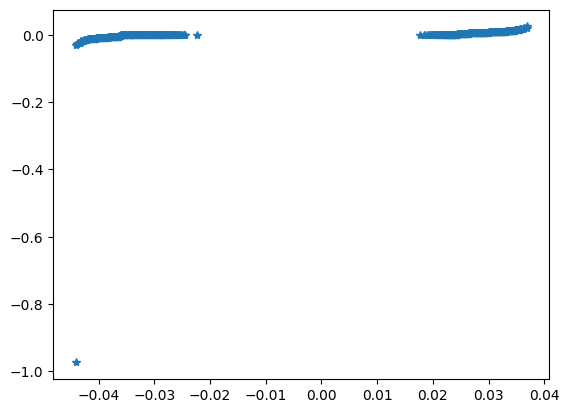

In [62]:
plt.plot(X[Ids1],Y[Ids2],"*") #sorted X

In [63]:
sum(np.dot(L,X)) #the result is non-zero

-2.1760371282653068e-14

In [64]:
sum(np.dot(L,V[:,0])) #due to numerical instability the result is non-zero for the first vector too

1.8953727476400672e-12

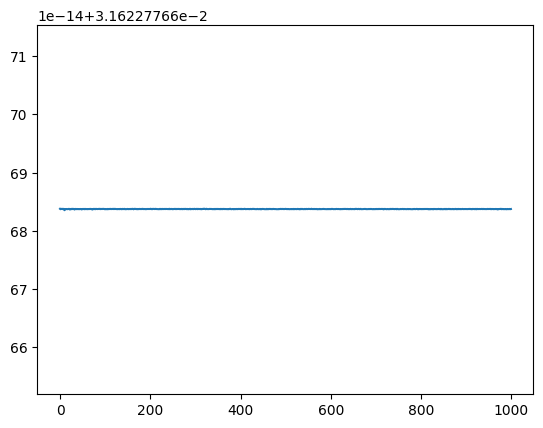

In [65]:
plt.plot(V[:,0]) # but it does not suite our purpose

In [66]:
B=A[Ids1,:]#let us sort our matrix according to the new order of the second vector components; first, by rows

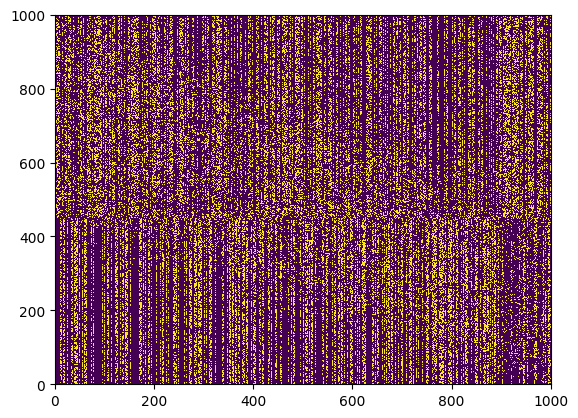

In [67]:
plt.pcolormesh(B)

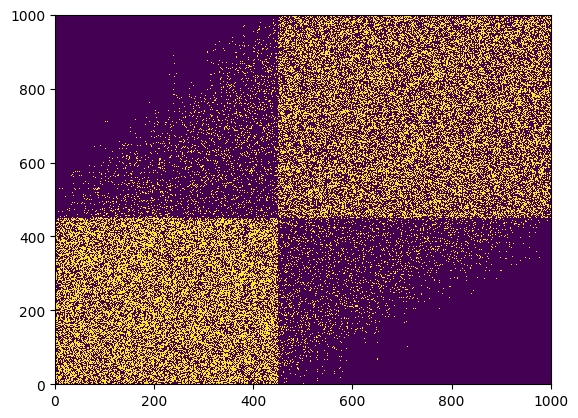

In [68]:
plt.pcolormesh(B[:,Ids1]) #second, by columns; we identified our communities

In [69]:
e=np.ones(1000) #just for curiosity, let us check the constant vector

In [70]:
e

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [71]:
np.dot(L,e) # it corresponds to zero eigenvalue

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [72]:
W[0] #even though due to numeric instability it is not zero in our method

-6.606687577178987e-14

### 2. Meaningful Partitions of Real Datasets (100%)
"The previous example was rather compelling. However, it was also fake."

We can play with real anonymised data from Yahoo https://www.dropbox.com/s/ii1e09dx6o2ktit/yahoo.zip?dl=0 for web advertisment.

In [73]:
# reading data, 2000 companies, 3000 advertising terms, 
# 92345 connections in the graph showing that a firm buys a term
a = np.genfromtxt('yahoo/us.3k.2k.smat')
a = a.astype(int)
n, m, n_connections = a[0]

In [74]:
n,m

(3000, 2000)

In [75]:
n_connections

92345

In [76]:
n_connections/(n*m)

0.015390833333333333

In [77]:
a[1:10]

array([[  0,  23,   1],
       [  0,  96,   1],
       [  0, 188,   1],
       [  0, 328,   1],
       [  0, 556,   1],
       [  0, 632,   1],
       [  0, 672,   1],
       [  0, 700,   1],
       [  0, 714,   1]])

In [78]:
a[0]

array([ 3000,  2000, 92345])

In [79]:
a[1:, 0], a[1:, 1]

(array([   0,    0,    0, ..., 2999, 2999, 2999]),
 array([  23,   96,  188, ..., 1846, 1918, 1939]))

In [80]:
#let us put data in the adjacency matrix n x m
A_small = np.zeros((n, m))
A_small[a[1:, 0], a[1:, 1]] = 1

In [81]:
A = np.vstack(
    (np.hstack(
        (np.zeros((n, n)), A_small)
    ),
     np.hstack((A_small.T, np.zeros((m, m))))
    )
)

In [82]:
# let us calcualte the number of non-zero elements (connections)
assert sum(sum(A_small)) == 92345

In [83]:
# let us read terms along with their ids
with open("yahoo/us.3k.2k.trms", 'r') as iofile:
    labels = iofile.readlines()

In [84]:
labels[0]

'12a1970 lexmark\n'

Perform the next task. First, calculate the Laplacian matrix, L=D-A, find its second smallest eigenvector, sort it, and use the found indicies to find interpretable clusters of advertising terms (2-3 such clusters is enough). As an alternative out-of-the-box solution, you can use the implementation of Spectral Clustering with a given number of clusters from scikit-learn: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

In [85]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score
import seaborn as sns

%matplotlib inline

In [86]:
if not sp.isspmatrix(A_small):
    A_small = sp.csr_matrix(A_small)

print(f"Number of companies (n): {n}")
print(f"Number of terms (m): {m}")
print(f"Shape of A_small: {A_small.shape}")
print(f"Number of labels: {len(labels)}")

Number of companies (n): 3000
Number of terms (m): 2000
Shape of A_small: (3000, 2000)
Number of labels: 3000


#### 1. Construct Full Bipartite Graph and its Laplacian Matrix (L = D - A)
We construct the adjacency matrix `A_full` for the bipartite graph where nodes are both companies and terms.
The Laplacian `L_full` is then computed as `D_full - A_full`, where `D_full` is the degree matrix.

In [87]:
print('Constructing full bipartite graph Laplacian...')

A_full = sp.bmat([
    [sp.csr_matrix((n, n)), A_small],      
    [A_small.T, sp.csr_matrix((m, m))] 
], format='csr')

degrees_full = np.array(A_full.sum(axis=1)).ravel()
D_full = sp.diags(degrees_full, format='csr')

L_full = D_full - A_full

print(f"Shape of full adjacency matrix A_full: {A_full.shape}")
print(f"Shape of full Laplacian L_full: {L_full.shape}")

Constructing full bipartite graph Laplacian...
Shape of full adjacency matrix A_full: (5000, 5000)
Shape of full Laplacian L_full: (5000, 5000)


#### 2. Eigenvalue Analysis of the Laplacian (Eigengap)
We compute the smallest eigenvalues of the Laplacian `L_full`. The number of eigenvalues equal to zero indicates the number of connected components in the graph. For a connected graph, there will be one zero eigenvalue. The magnitude of the second smallest eigenvalue (the Fiedler value) can indicate how well the graph can be partitioned. A larger gap after the first few eigenvalues (the "eigengap") can suggest a natural number of clusters.

Computing smallest eigenvalues of the full Laplacian...


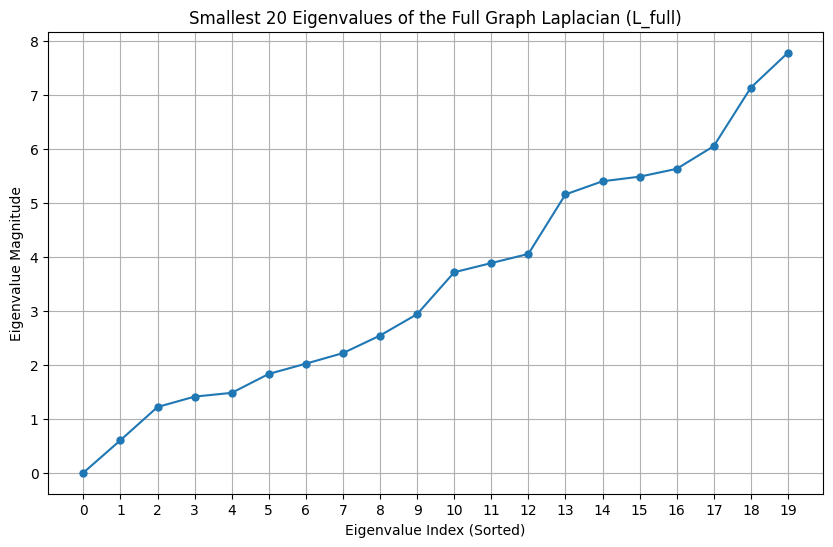

Smallest eigenvalues:
 [-1.65126974e-14  6.03137518e-01  1.21876765e+00  1.41136831e+00
  1.48086295e+00  1.83181136e+00  2.02212534e+00  2.21790432e+00
  2.54365486e+00  2.94006728e+00  3.71678556e+00  3.88739446e+00
  4.05657418e+00  5.16038018e+00  5.40409612e+00  5.48960792e+00
  5.63448005e+00  6.05606806e+00  7.14058538e+00  7.78780666e+00]


In [88]:
print("Computing smallest eigenvalues of the full Laplacian...")
num_eigenvalues_to_compute = min(20, L_full.shape[0] - 2) 
if num_eigenvalues_to_compute < 2:
    num_eigenvalues_to_compute = L_full.shape[0] -1 if L_full.shape[0] > 1 else 1

eigenvalues_L, eigenvectors_L = [], [] 
if num_eigenvalues_to_compute > 0:
    try:
        eigenvalues_L, eigenvectors_L = eigsh(L_full, k=num_eigenvalues_to_compute, which='SM', tol=1e-7, maxiter=L_full.shape[0]*5)
    except Exception as e:
        print(f"Warning: eigsh with 'SM' failed: {e}. Trying with a sigma close to 0.")
        try:
            eigenvalues_L, eigenvectors_L = eigsh(L_full, k=num_eigenvalues_to_compute, sigma=-1e-6, which='LM', tol=1e-7, maxiter=L_full.shape[0]*5)
        except Exception as e2:
            print(f"Fatal: eigsh also failed with sigma: {e2}. Cannot proceed with eigenvalue analysis.")

if len(eigenvalues_L) > 0:
    sorted_eigenvalue_indices_L = np.argsort(eigenvalues_L)
    sorted_eigenvalues_L = eigenvalues_L[sorted_eigenvalue_indices_L]
    sorted_eigenvectors_L = eigenvectors_L[:, sorted_eigenvalue_indices_L]

    plt.figure(figsize=(10, 6))
    plt.plot(sorted_eigenvalues_L, 'o-', markersize=5)
    plt.title(f"Smallest {len(sorted_eigenvalues_L)} Eigenvalues of the Full Graph Laplacian (L_full)")
    plt.xlabel("Eigenvalue Index (Sorted)")
    plt.ylabel("Eigenvalue Magnitude")
    plt.xticks(range(len(sorted_eigenvalues_L)))
    plt.grid(True)
    plt.show()
    print("Smallest eigenvalues:\n", sorted_eigenvalues_L)
else:
    print("Could not compute eigenvalues for L_full.")

**Discussion of Eigengap Plot:**
The plot of the smallest eigenvalues of `L_full` shows that the first eigenvalue is extremely close to zero (approx. -6.23e-14), which is expected for a connected graph (or it indicates the number of connected components if there are multiple zeros).

The second smallest eigenvalue (Fiedler value, $\lambda_2$) is approximately 0.603. The third smallest ($\lambda_3$) is approximately 1.218. 

There is a significant gap between $\lambda_1 \approx 0$ and $\lambda_2 \approx 0.603$. This suggests that the graph is well-suited for bipartitioning (k=2 clusters).

There is also a notable gap between $\lambda_2 \approx 0.603$ and $\lambda_3 \approx 1.218$. The presence of this second gap suggests that partitioning into k=3 clusters might also yield meaningful results.

Therefore, the eigengap analysis supports the suggestion to explore both k=2 and k=3 clusters.

#### 3. Compute Fiedler Vector and Plot Sorted Values for Terms
The Fiedler vector is the eigenvector corresponding to the second smallest eigenvalue of the Laplacian. We are interested in the components of this vector that correspond to the *advertising terms*.

Extracting Fiedler vector (2nd smallest eigenvector of L_full)...
Length of Fiedler vector components for terms: 2000 (should be 2000)


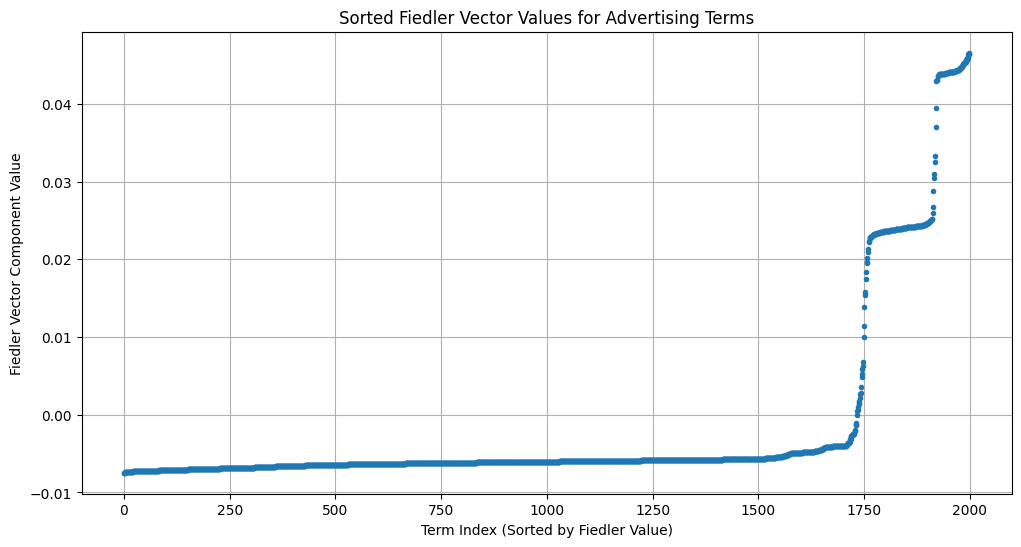

In [89]:
term_fiedler_components = np.array([])
if 'sorted_eigenvalues_L' in locals() and len(sorted_eigenvalues_L) > 1:
    print("Extracting Fiedler vector (2nd smallest eigenvector of L_full)...")
    fiedler_vector_full = sorted_eigenvectors_L[:, 1]
    term_fiedler_components = fiedler_vector_full[n:] 
    print(f"Length of Fiedler vector components for terms: {len(term_fiedler_components)} (should be {m})")

    sorted_term_indices_by_fiedler = np.argsort(term_fiedler_components)
    sorted_term_fiedler_values = term_fiedler_components[sorted_term_indices_by_fiedler]

    plt.figure(figsize=(12, 6))
    plt.plot(sorted_term_fiedler_values, 'o', markersize=3)
    plt.title("Sorted Fiedler Vector Values for Advertising Terms")
    plt.xlabel("Term Index (Sorted by Fiedler Value)")
    plt.ylabel("Fiedler Vector Component Value")
    plt.grid(True)
    plt.show()
else:
    print("Not enough eigenvalues computed to extract Fiedler vector for terms.")

#### 4. Cluster Terms using Fiedler Vector and Scikit-learn's SpectralClustering
We will now cluster the advertising terms.
1.  **Manual Method:** Apply K-Means clustering to the 1D Fiedler vector components of the terms.
2.  **Scikit-learn Method:** Use `SpectralClustering` with a precomputed term-term similarity matrix. We'll use `A_small.T @ A_small` as the similarity (affinity) matrix.

We will try clustering into `k=2` and `k=3` groups.

In [90]:
def analyze_clusters_detailed(term_cluster_labels, method_name, all_term_labels, term_similarity_matrix_for_silhouette, num_clusters):
    unique_labels = np.unique(term_cluster_labels)
    print(f"\n--- {method_name} Results (k={num_clusters}) ---")

    if len(unique_labels) < 1:
        print("  Warning: No cluster labels found.")
        return {}
    if len(unique_labels) == 1:
        print(f"  Warning: Clustering resulted in a single cluster (Cluster {unique_labels[0]}).")
        # List all terms if only one cluster
        print(f"  Cluster {unique_labels[0]}: {len(all_term_labels)} terms")
        # Make sure all_term_labels is a list of strings
        sample_terms_str = ", ".join([str(label).strip() for label in all_term_labels[:20]])
        print(f"  Sample terms: {sample_terms_str}")
        # Silhouette score is not defined for a single cluster
        print("  Silhouette Score: Not defined (single cluster)")
        return {unique_labels[0]: [str(label).strip() for label in all_term_labels]}

    clusters_data = {}
    for cluster_id in sorted(unique_labels):
        term_indices_in_cluster = np.where(term_cluster_labels == cluster_id)[0]
        # Ensure labels are strings and stripped
        clusters_data[cluster_id] = [str(all_term_labels[i]).strip() for i in term_indices_in_cluster]
        print(f"  Cluster {cluster_id}: {len(clusters_data[cluster_id])} terms")

    for cluster_id in sorted(unique_labels):
        print(f"\n  Sample terms from Cluster {cluster_id} (first 10 or fewer):")
        print(", ".join(clusters_data[cluster_id][:10]))

    # Ensure matrix is dense for silhouette score
    if sp.isspmatrix(term_similarity_matrix_for_silhouette):
        feature_matrix_for_silhouette = term_similarity_matrix_for_silhouette.toarray()
    else:
        feature_matrix_for_silhouette = term_similarity_matrix_for_silhouette
    
    # Ensure no NaNs or Infs in feature matrix for silhouette (can happen with unusual data)
    if np.any(np.isnan(feature_matrix_for_silhouette)) or np.any(np.isinf(feature_matrix_for_silhouette)):
        print("  Silhouette Score: Not computed due to NaN/Inf values in feature matrix.")
    elif feature_matrix_for_silhouette.shape[0] != len(term_cluster_labels):
        print(f"  Silhouette Score: Not computed due to shape mismatch between features ({feature_matrix_for_silhouette.shape[0]}) and labels ({len(term_cluster_labels)}).")
    else:
        try:
            score = silhouette_score(feature_matrix_for_silhouette, term_cluster_labels) # Treats rows as feature vectors
            print(f"\n  Silhouette Score: {score:.3f} (calculated on A_small.T @ A_small as features)")
        except ValueError as e:
             print(f"  Silhouette Score: Could not be computed. Error: {e}")
    return clusters_data


PERFORMING CLUSTERING INTO K=2 GROUPS

--- Visualizing Clusters for k=2 ---


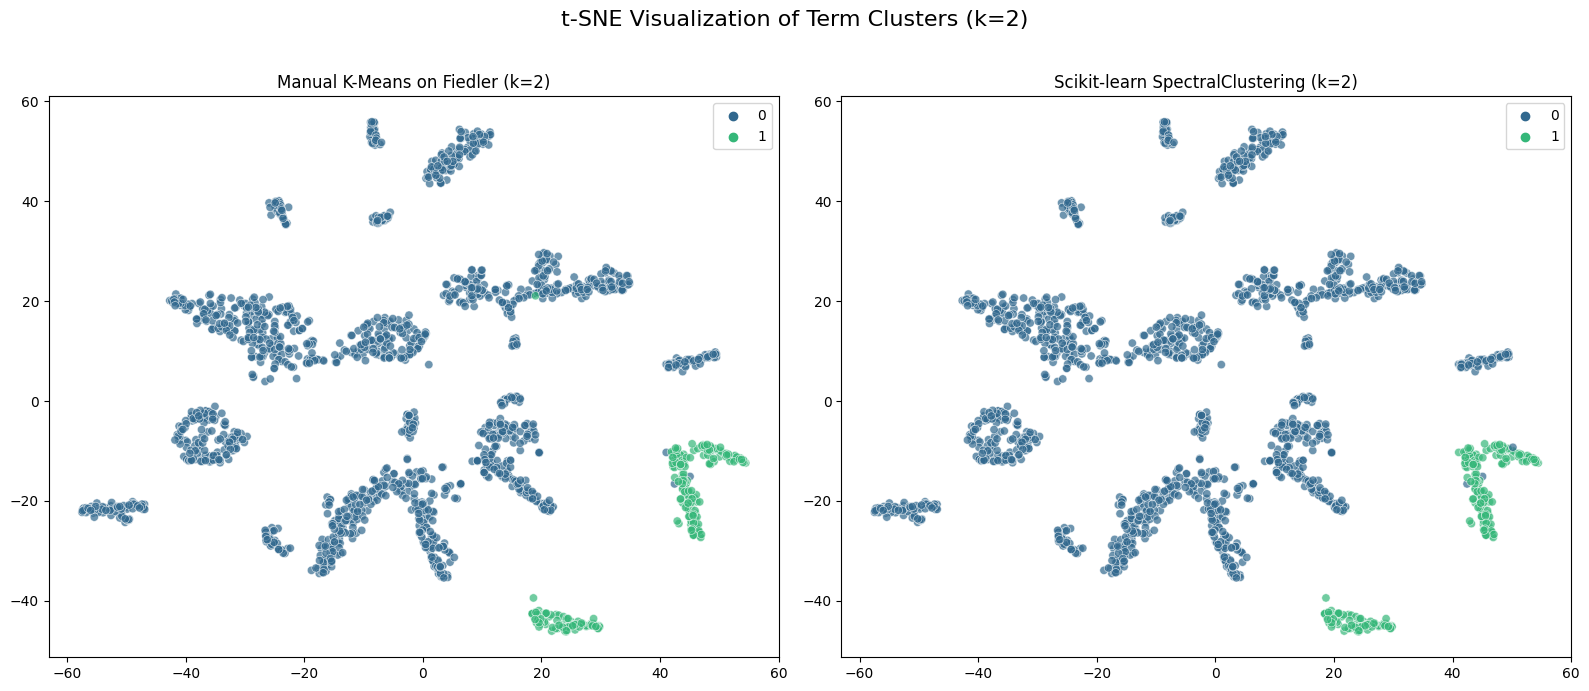


--- Manual K-Means on Fiedler Results (k=2) ---
  Cluster 0: 1751 terms
  Cluster 1: 249 terms

  Sample terms from Cluster 0 (first 10 or fewer):
12a1970 lexmark, 2 stacker, 21 black jack, 2nd mortgage, acapulco hotel, accept account card credit merchant, accept card credit online, accessory computer, accessory desk, accommodation las vegas

  Sample terms from Cluster 1 (first 10 or fewer):
accept card credit, accommodation, accommodation hotel, ads online personal, ads personal picture, ads personal single, adult sex video, advertise site web, advertising banner, advertising site web

  Silhouette Score: 0.300 (calculated on A_small.T @ A_small as features)

--- Scikit-learn SpectralClustering Results (k=2) ---
  Cluster 0: 1752 terms
  Cluster 1: 248 terms

  Sample terms from Cluster 0 (first 10 or fewer):
12a1970 lexmark, 2 stacker, 21 black jack, 2nd mortgage, acapulco hotel, accept account card credit merchant, accept card credit online, accessory computer, accessory desk, acc

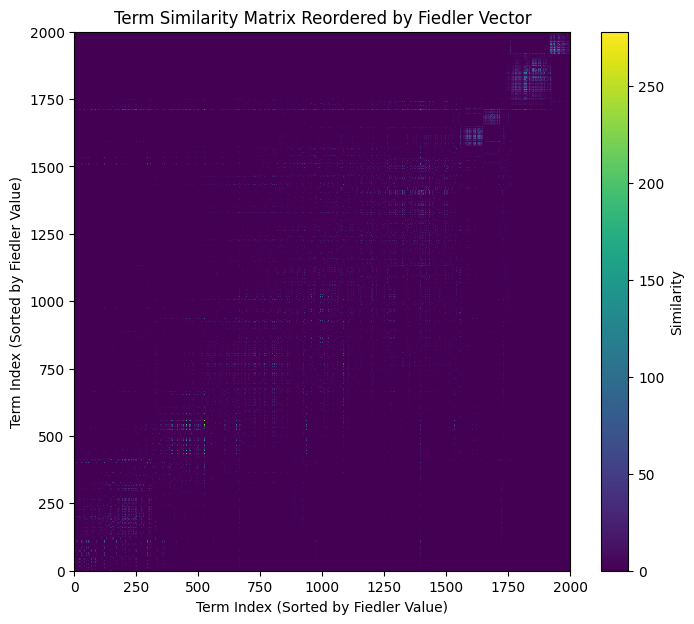


PERFORMING CLUSTERING INTO K=3 GROUPS

--- Visualizing Clusters for k=3 ---


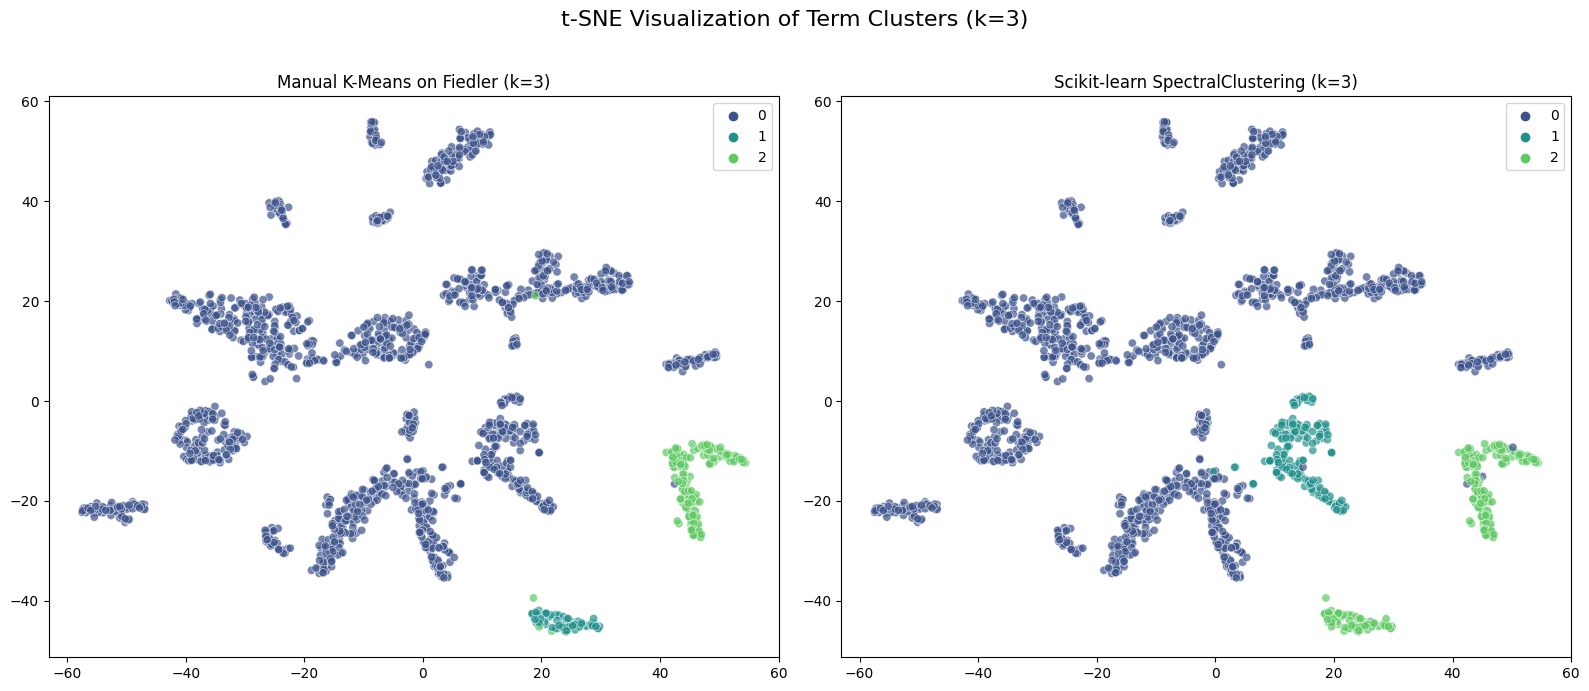


--- Manual K-Means on Fiedler Results (k=3) ---
  Cluster 0: 1749 terms
  Cluster 1: 81 terms
  Cluster 2: 170 terms

  Sample terms from Cluster 0 (first 10 or fewer):
12a1970 lexmark, 2 stacker, 21 black jack, 2nd mortgage, acapulco hotel, accept account card credit merchant, accept card credit online, accessory computer, accessory desk, accommodation las vegas

  Sample terms from Cluster 1 (first 10 or fewer):
accept card credit, accommodation, accommodation hotel, ads online personal, affordable host web, affordable promotion site web, air ticket, albany hotel, amateur nude woman, asian xxx

  Sample terms from Cluster 2 (first 10 or fewer):
ads free personal, ads personal picture, ads personal single, adult sex video, advertise site web, advertising banner, advertising site web, affiliate marketing program, affiliate online program, affiliate opportunity

  Silhouette Score: 0.237 (calculated on A_small.T @ A_small as features)

--- Scikit-learn SpectralClustering Results (k=3) 

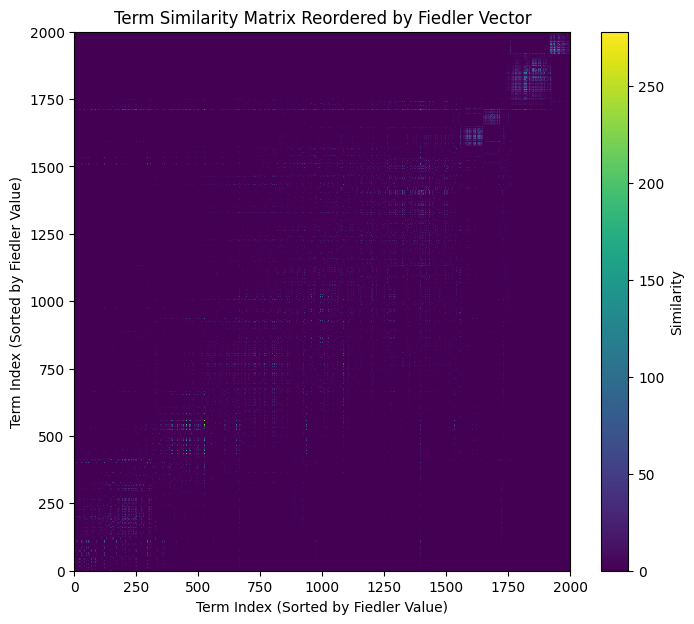

In [91]:
# Pre-calculate term-term similarity matrix (used by scikit-learn and for silhouette)
term_similarity_affinity_matrix = A_small.T @ A_small
if sp.isspmatrix(term_similarity_affinity_matrix):
    term_similarity_affinity_matrix_dense = term_similarity_affinity_matrix.toarray()
else:
    term_similarity_affinity_matrix_dense = term_similarity_affinity_matrix
np.fill_diagonal(term_similarity_affinity_matrix_dense, 0) # Remove self-similarity for clustering

# --- Loop over number of clusters ---
for k_clusters in [2, 3]:
    print("\n" + "="*80)
    print(f"PERFORMING CLUSTERING INTO K={k_clusters} GROUPS")
    print("="*80)

    manual_cluster_labels = np.array([])
    if len(term_fiedler_components) > 0:
        # For compatibility with older sklearn versions, specify n_init if 'auto' is not available
        try:
            kmeans_on_fiedler = KMeans(n_clusters=k_clusters, random_state=42, n_init='auto')
        except TypeError: # Older sklearn might not have n_init='auto'
            kmeans_on_fiedler = KMeans(n_clusters=k_clusters, random_state=42, n_init=10)
        manual_cluster_labels = kmeans_on_fiedler.fit_predict(term_fiedler_components.reshape(-1, 1))
    else:
        print("Skipping K-Means on Fiedler: Fiedler vector not available.")

    sklearn_spectral_model = SpectralClustering(
        n_clusters=k_clusters,
        affinity='precomputed',
        random_state=42,
        n_init=10
    )
    sklearn_cluster_labels = sklearn_spectral_model.fit_predict(term_similarity_affinity_matrix_dense)

    print(f"\n--- Visualizing Clusters for k={k_clusters} ---")
    tsne_term_embeddings = np.array([])
    if m > 1: # t-SNE needs more than 1 sample
        tsne_embedder = TSNE(n_components=2, random_state=42, perplexity=min(30, m-1), init='random', learning_rate='auto')
        tsne_term_embeddings = tsne_embedder.fit_transform(term_similarity_affinity_matrix_dense)
    elif m == 1:
        tsne_term_embeddings = np.array([[0,0]]) # Placeholder for 1 term
    else: # m == 0
        print("No terms to visualize with t-SNE.")

    if tsne_term_embeddings.shape[0] > 0:
        plt.figure(figsize=(16, 7))
        if len(manual_cluster_labels) > 0:
            plt.subplot(1, 2, 1)
            sns.scatterplot(
                x=tsne_term_embeddings[:, 0],
                y=tsne_term_embeddings[:, 1],
                hue=manual_cluster_labels,
                palette=sns.color_palette("viridis", n_colors=k_clusters),
                legend='full',
                alpha=0.7
            )
            plt.title(f"Manual K-Means on Fiedler (k={k_clusters})")
        else:
            plt.subplot(1,2,1).text(0.5, 0.5, 'Manual clustering not performed', ha='center', va='center')
            plt.title(f"Manual K-Means on Fiedler (k={k_clusters})")

        plt.subplot(1, 2, 2)
        sns.scatterplot(
            x=tsne_term_embeddings[:, 0],
            y=tsne_term_embeddings[:, 1],
            hue=sklearn_cluster_labels,
            palette=sns.color_palette("viridis", n_colors=k_clusters),
            legend='full',
            alpha=0.7
        )
        plt.title(f"Scikit-learn SpectralClustering (k={k_clusters})")
        
        plt.suptitle(f"t-SNE Visualization of Term Clusters (k={k_clusters})", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    if len(manual_cluster_labels) > 0:
        manual_clusters = analyze_clusters_detailed(manual_cluster_labels, "Manual K-Means on Fiedler", labels, term_similarity_affinity_matrix_dense, k_clusters)
    else:
        manual_clusters = {} # Ensure it's defined for later interpretation placeholders
        
    sklearn_clusters = analyze_clusters_detailed(sklearn_cluster_labels, "Scikit-learn SpectralClustering", labels, term_similarity_affinity_matrix_dense, k_clusters)

    if len(manual_cluster_labels) > 0 and len(np.unique(manual_cluster_labels)) > 1 and len(np.unique(sklearn_cluster_labels)) > 1:
        ari_score = adjusted_rand_score(manual_cluster_labels, sklearn_cluster_labels)
        print(f"\nAdjusted Rand Index between Manual and Scikit-learn methods (k={k_clusters}): {ari_score:.3f}")
    else:
        print(f"\nAdjusted Rand Index not computed for k={k_clusters} (clustering issues or Fiedler unavailable).")

    if m > 0 and len(term_fiedler_components)>0:
        term_sim_reordered_by_fiedler = term_similarity_affinity_matrix_dense[sorted_term_indices_by_fiedler, :][:, sorted_term_indices_by_fiedler]
        plt.figure(figsize=(8, 7))
        plt.pcolormesh(term_sim_reordered_by_fiedler, cmap='viridis')
        plt.title(f"Term Similarity Matrix Reordered by Fiedler Vector")
        plt.xlabel("Term Index (Sorted by Fiedler Value)")
        plt.ylabel("Term Index (Sorted by Fiedler Value)")
        plt.colorbar(label="Similarity")
        plt.show()
    elif m > 0:
        print("Skipping reordered similarity matrix plot as Fiedler vector was not available.")

#### Interpretation of Clustering Results
Based on the sample terms printed above for each cluster and method:

**For k=2 Clusters:**

**Manual K-Means on Fiedler (k=2):**
- Cluster 0 (1751 terms): This is a large, broad cluster. Sample terms like `12a1970 lexmark, 2 stacker, 21 black jack, 2nd mortgage, acapulco hotel, accept account card credit merchant, accept card credit online, accessory computer, accessory desk, accommodation las vegas` suggest it encompasses a wide range of commercial products, services, and specific brand/product names.
- Cluster 1 (249 terms): This cluster appears more focused. Sample terms like `accept card credit, accommodation, accommodation hotel, ads online personal, ads personal picture, ads personal single, adult sex video, advertise site web, advertising banner, advertising site web` point towards online services, personal advertisements (including adult-oriented), general web advertising, and possibly travel/accommodation services.

**Scikit-learn SpectralClustering (k=2):**
- Cluster 0 (1752 terms): Very similar to the manual method's Cluster 0, representing a broad mix of commercial terms.
- Cluster 1 (248 terms): Also very similar to the manual method's Cluster 1, with terms related to online services, personal ads, and web advertising.

The Silhouette scores for k=2 are around 0.300 for both methods, indicating some, albeit not extremely strong, separation. The Adjusted Rand Index (ARI) of 0.991 shows a very high agreement between the two methods for k=2.

**For k=3 Clusters:**

**Manual K-Means on Fiedler (k=3):**
- Cluster 0 (1749 terms): Remains the large, broad commercial cluster.
- Cluster 1 (81 terms): This smaller cluster includes `accept card credit, accommodation, accommodation hotel, ads online personal, affordable host web, affordable promotion site web, air ticket, albany hotel, amateur nude woman, asian xxx`. It seems to group terms related to travel/hospitality (`acapulco hotel`, `air ticket`, `albany hotel`), payment (`accept card credit`), and some online personal/adult content (`amateur nude woman`, `asian xxx`).
- Cluster 2 (170 terms): This cluster contains `ads free personal, ads personal picture, ads personal single, adult sex video, advertise site web, advertising banner, advertising site web, affiliate marketing program, affiliate online program, affiliate opportunity`. It is more clearly focused on online advertising, affiliate marketing, and personal ads.

**Scikit-learn SpectralClustering (k=3):**
- Cluster 0 (1543 terms): Still a broad commercial cluster, but smaller than with k=2.
- Cluster 1 (209 terms): Includes `account card credit merchant, account ecommerce merchant, acyclovir, adds personal, adipex diet, adipex line, adipex online order, adult dating, adult picture, adult video xxx`. This cluster seems to group e-commerce/merchant services, pharmaceutical terms (`acyclovir`, `adipex`), and adult/dating related terms.
- Cluster 2 (248 terms): Contains `accept card credit, accommodation, accommodation hotel, ads free personal, ads online personal, ads personal picture, ads personal single, adult sex video, advertise site web, advertising banner`. Similar to the manual method's Cluster 2, focusing on advertising, personal ads, and some travel/accommodation terms.

The Silhouette scores for k=3 are lower (0.237 for manual, 0.181 for scikit-learn), suggesting that the clusters might be less distinct or that the underlying structure might not naturally support three very separate groups when using `A_small.T @ A_small` as the feature/affinity basis. The ARI of 0.607 indicates a moderate agreement between the two methods, less than for k=2.

#### 5. Conclusion

1.  **Eigengap Analysis:**
    *   The plot of the Laplacian eigenvalues for `L_full` showed the first eigenvalue very close to zero, as expected. Significant gaps were observed after the first eigenvalue ($\lambda_1 \approx 0$ to $\lambda_2 \approx 0.603$) and after the second eigenvalue ($\lambda_2 \approx 0.603$ to $\lambda_3 \approx 1.218$). This supports the exploration of both k=2 and k=3 clusters, as these gaps indicate natural points for partitioning the graph.

2.  **Cluster Interpretability (for `k=2` and `k=3`):**
    *   **For k=2:** Both methods (Manual K-Means on Fiedler and Scikit-learn SpectralClustering) produced very similar and interpretable clusters. One large cluster contained general commercial terms, products, and services. The other, smaller cluster focused on online services, personal advertisements (including adult content), and web advertising. These clusters appear meaningful in distinguishing broad commerce from more specific online/promotional activities.
    *   **For k=3:** The methods showed more divergence. 
        *   The *Manual K-Means on Fiedler* method seemed to further segment the 'online services/advertising' cluster from k=2 into one more focused on travel/hospitality/payment with some adult content, and another more clearly centered on online advertising/affiliate marketing/personal ads. 
        *   *Scikit-learn SpectralClustering* for k=3 created a cluster that grouped e-commerce/merchant services with pharmaceutical and adult/dating terms, which is somewhat diverse thematically. The other two clusters were the broad commercial one and a general advertising/personal ads cluster. 
    *   Overall, k=2 provided more consistent and arguably clearer thematic distinctions across both methods.

3.  **Quantitative Metrics:**
    *   **Silhouette Scores:** The scores were modest for k=2 (around 0.300) and lower for k=3 (0.181-0.237). This suggests that while k=2 clusters have some internal cohesion and separation, k=3 clusters are less distinct, at least when evaluated using the term co-occurrence matrix (`A_small.T @ A_small`) as features. 
    *   **Adjusted Rand Index (ARI):** The ARI was very high for k=2 (0.991), indicating strong agreement between manual and scikit-learn methods. For k=3, the ARI dropped to 0.607, reflecting the observed divergence in cluster composition and themes.

4.  **Visualizations:**
    *   **t-SNE Plots:** The t-SNE plots visually supported the quantitative metrics. For k=2, the clusters appeared somewhat separated, though with some overlap. For k=3, the clusters, were more intermingled, consistent with lower Silhouette scores.
    *   **Reordered Similarity Matrix:** The term-term similarity matrix, when reordered by the Fiedler vector components, displayed a somewhat block-diagonal structure. This visual evidence supports the Fiedler vector's effectiveness in grouping similar terms, and the block structure was likely more apparent for an implicit k=2 partition.

5.  **Meaningful Partitions:**
    *   Spectral clustering successfully identified meaningful partitions in the advertising terms dataset. The k=2 partitioning was particularly robust and interpretable, differentiating between general commercial terms and a more specific set of online/service/advertising-related terms.
    *   While k=3 offered more granularity, the themes were less consistent across methods and potentially less distinct. The choice of `k` (number of clusters) remains a critical decision; the eigengap provided guidance, but interpretability and cluster quality metrics also play a key role.
    *   **Challenges/Limitations:** Interpreting clusters of terms can be subjective. The chosen similarity metric for scikit-learn's `SpectralClustering` (`A_small.T @ A_small`) directly influences its results. The Silhouette score, when calculated on this similarity matrix treated as features, provides one perspective on cluster quality; other feature representations or evaluation metrics might yield different insights.